# SLDSC

## Plot

### Meta traits

In [1]:
## Library
library(data.table)
library(ggplot2)
library(RColorBrewer)
library(colorspace)
library(ggpubr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday()    masks data.table::wd

In [2]:
#studies <- c('ROSMAP_gpQTL_glycosylation_unadjusted') ## change context
all_studies <- list.dirs("/restricted/projectnb/xqtl/jaempawi/xqtl/output/",full.names = F,recursive = F) # All QTL studies - FIXME
studies <- all_studies[all_studies != "qtl.joint_tau"]
studies

[1] "AC_DeJager_eQTL"                "Ast_10_Kellis_eQTL"            
 [3] "Ast_DeJager_eQTL"               "Ast_Kellis_eQTL"               
 [5] "Ast_mega_eQTL"                  "BM_10_MSBB_eQTL"               
 [7] "BM_22_MSBB_eQTL"                "BM_36_MSBB_eQTL"               
 [9] "BM_44_MSBB_eQTL"                "DLPFC_Bennett_pQTL"            
[11] "DLPFC_DeJager_eQTL"             "DLPFC_Klein_gpQTL_adjusted"    
[13] "DLPFC_Klein_gpQTL_unadjusted"   "Exc_DeJager_eQTL"              
[15] "Exc_Kellis_eQTL"                "Exc_mega_eQTL"                 
[17] "Inh_DeJager_eQTL"               "Inh_Kellis_eQTL"               
[19] "Inh_mega_eQTL"                  "Knight_eQTL_brain"             
[21] "Knight_pQTL_brain"              "MSBB"                          
[23] "MSBB_BM36_pQTL"                 "MSBB_BM_10_eQTL"               
[25] "MSBB_BM_22_eQTL"                "MSBB_BM_36_eQTL"               
[27] "MSBB_BM_44_eQTL"                "Metabrain_Basalganglia"        
[29] "Metabrain_Cerebellum"           "Metabrain_Cortex"              
[31] "Metabrain_Hippocampus"          "Metabrain_Spinalcord"          
[33] "MiGA_GFM_eQTL"                  "MiGA_GTS_eQTL"                 
[35] "MiGA_SVZ_eQTL"                  "MiGA_THA_eQTL"                 
[37] "Mic_12_Kellis_eQTL"             "Mic_13_Kellis_eQTL"            
[39] "Mic_DeJager_eQTL"               "Mic_Kellis_eQTL"               
[41] "Mic_mega_eQTL"                  "OPC_DeJager_eQTL"              
[43] "OPC_Kellis_eQTL"                "OPC_mega_eQTL"                 
[45] "Oli_DeJager_eQTL"               "Oli_Kellis_eQTL"               
[47] "Oli_mega_eQTL"                  "PCC_DeJager_eQTL"              
[49] "ROSMAP"                         "ROSMAP_AC_DeJager_eQTL"        
[51] "ROSMAP_AC_sQTL"                 "ROSMAP_Ast_DeJager_eQTL"       
[53] "ROSMAP_Ast_mega_eQTL"           "ROSMAP_DLPFC_Bennett_pQTL"     
[55] "ROSMAP_DLPFC_DeJager_eQTL"      "ROSMAP_DLPFC_sQTL"             
[57] "ROSMAP_Exc_DeJager_eQTL"        "ROSMAP_Exc_mega_eQTL"          
[59] "ROSMAP_Inh_DeJager_eQTL"        "ROSMAP_Inh_mega_eQTL"          
[61] "ROSMAP_Mic_DeJager_eQTL"        "ROSMAP_Mic_mega_eQTL"          
[63] "ROSMAP_OPC_DeJager_eQTL"        "ROSMAP_OPC_mega_eQTL"          
[65] "ROSMAP_Oli_DeJager_eQTL"        "ROSMAP_Oli_mega_eQTL"          
[67] "ROSMAP_PCC_DeJager_eQTL"        "ROSMAP_PCC_sQTL"               
[69] "ROSMAP_haQTL_all_pip0.5_inCS"   "ROSMAP_haQTL_all_pip0.5_maxpip"
[71] "ROSMAP_haQTL_pc1_pip0.5_inCS"   "ROSMAP_haQTL_pc1_pip0.5_maxpip"
[73] "ROSMAP_mQTL_all_pip0.5_inCS"    "ROSMAP_mQTL_all_pip0.5_maxpip" 
[75] "ROSMAP_mQTL_pc1_pip0.5_inCS"    "ROSMAP_mQTL_pc1_pip0.5_maxpip" 
[77] "ROSMAP_monocyte_ROSMAP_eQTL"    "STARNET_eQTL_Mac"              
[79] "monocyte_ROSMAP_eQTL"

In [3]:
# res.dir <- "./" ## change path
res.dir <- "/restricted/projectnb/xqtl/jaempawi/xqtl/output/" # Please untar the tar.gz filer.gz #FIXME

tau.list <- list()
enrich.list <- list()
for (study in studies) {
  # meta.dir <- paste0(res.dir, study, "/sumstats/all_m/processed_stats_2/single_tau.",study, ".meta_processed_stats.rds")
  meta.dir <- paste0(res.dir, study, "/sumstats/processed_stats_2/single_tau.",study, ".meta_processed_stats.rds") #FIXME
  metas <- readRDS(meta.dir)
  tau.list[[study]] <- data.frame(metas$tau)
  tau.list[[study]]$study <- study
  tau.list[[study]]$trait <- rownames(tau.list[[study]])
  enrich.list[[study]] <- data.frame(metas$enrichment)
  enrich.list[[study]]$study <- study
  enrich.list[[study]]$trait <- rownames(enrich.list[[study]])
  
}

In [4]:

tau.df <- do.call(rbind, tau.list)
enrich.df <- do.call(rbind, enrich.list)

# 95% confidence interval
tau.df$Lower <- tau.df$Mean - 1.96*tau.df$SD
tau.df$Upper <- tau.df$Mean + 1.96*tau.df$SD
tau.df$signif <- tau.df$P < 0.05
enrich.df$Lower <- enrich.df$Mean - 1.96*enrich.df$SD
enrich.df$Upper <- enrich.df$Mean + 1.96*enrich.df$SD
enrich.df$signif <- enrich.df$P < 0.05



In [5]:
reorder_levels <- tau.df %>%
  filter(trait == "Brain") %>%          # choose reference trait
  arrange(desc(Mean)) %>%               # descending by Mean
  pull(study) %>%                       # get vector
  unique()

tau.df$study <- factor(tau.df$study, levels = reorder_levels)

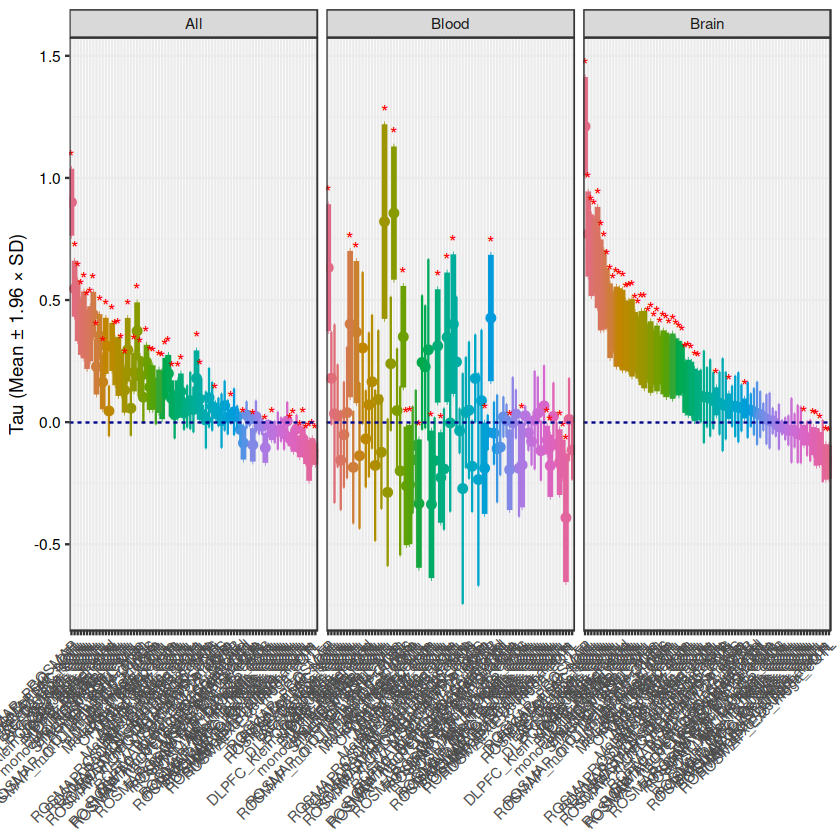

In [6]:
## 5. Mark significance (95 % CI does NOT include zero) ---------
tau.df <- tau.df %>%
  mutate(signif = Lower * Upper > 0)

## 6. Prepare a colour palette ---------------------------------
all_colors <- qualitative_hcl(
  n = length(levels(tau.df$study)),
  palette = "Dark 3"
)

## 7. Plot marginal_tau -------------------------------------------------------
p <- ggplot(
  tau.df,
  aes(x = study, y = Mean,
      colour = study, group = trait)         
) +
  # point estimates
  geom_point(
    position = position_dodge(width = 0.6),
    size = 2
  ) +
  # error bars (95 % CI)
  geom_errorbar(
    aes(ymin = Lower, ymax = Upper,
        linewidth = signif),               # thick if significant
    position = position_dodge(width = 0.6),
    width = 0.25
  ) +
  # asterisks on significant estimates
  geom_text(
    data = subset(tau.df, signif),
    aes(label = "*", y = Upper + 0.05),
    position = position_dodge(width = 0.6),
    colour = "red", size = 4
  ) +
  # colour & linewidth scales
  scale_color_manual(values = all_colors) +
  scale_linewidth_manual(values = c(`TRUE` = 1.2, `FALSE` = 0.5)) +
  # horizontal zero line
  geom_hline(yintercept = 0, linetype = 2, colour = "darkblue") +
  # theme tweaks
  theme_bw() +
  theme(
    axis.text.x  = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y  = element_text(size = 9,  colour = "black"),
    axis.title.x = element_blank(),
    legend.position = "none"
  ) +
  # axis title
  ylab("Tau (Mean ± 1.96 × SD)") + facet_wrap(~trait)

## 8. Display plot ----------------------------------------------
print(p)


Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


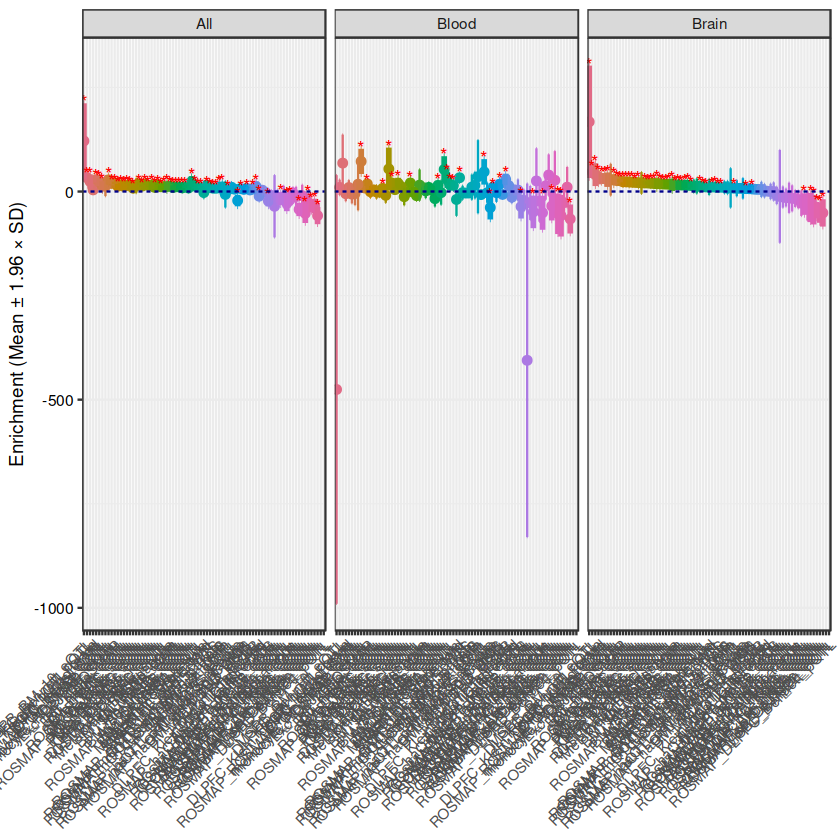

In [7]:
## Enrichment

reorder_levels <- enrich.df %>%
  filter(trait == "Brain") %>%          # choose reference trait
  arrange(desc(Mean)) %>%               # descending by Mean
  pull(study) %>%                       # get vector
  unique()

enrich.df$study <- factor(enrich.df$study, levels = reorder_levels)

## 5. Mark significance (95 % CI does NOT include zero) ---------
enrich.df <- enrich.df %>%
  mutate(signif = Lower * Upper > 0)

## 6. Prepare a colour palette ---------------------------------
all_colors <- qualitative_hcl(
  n = length(levels(enrich.df$study)),
  palette = "Dark 3"
)

## 7. Plot Enrichment-------------------------------------------------------
p <- ggplot(
  enrich.df,
  aes(x = study, y = Mean,
      colour = study)      
) +
  # point estimates
  geom_point(
    position = position_dodge(width = 0.6),
    size = 2
  ) +
  # error bars (95 % CI)
  geom_errorbar(
    aes(ymin = Lower, ymax = Upper,
        linewidth = signif),               # thick if significant
    position = position_dodge(width = 0.6),
    width = 0.25
  ) +
  # asterisks on significant estimates
  geom_text(
    data = subset(enrich.df, signif),
    aes(label = "*", y = Upper + 2),
    position = position_dodge(width = 0.6),
    colour = "red", size = 4
  ) +
  # colour & linewidth scales
  scale_color_manual(values = all_colors) +
  scale_linewidth_manual(values = c(`TRUE` = 1.2, `FALSE` = 0.5)) +
  # horizontal zero line
  geom_hline(yintercept = 1, linetype = 2, colour = "darkblue") +
  # theme tweaks
  theme_bw() +
  theme(
    axis.text.x  = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text.y  = element_text(size = 9,  colour = "black"),
    axis.title.x = element_blank(),
    legend.position = "none"
  ) +
  # axis title
  ylab("Enrichment (Mean ± 1.96 × SD)") + facet_wrap(~trait)



## 8. Display plot ----------------------------------------------
print(p)

### Seprate traits

In [8]:
library(tidyverse)

In [9]:
## Library
library(data.table)
library(ggplot2)
library(RColorBrewer)
library(colorspace)
library(ggpubr)

In [19]:
# ttmp <- readRDS('./ROSMAP_gpQTL_glycosylation_unadjusted.single_tau.initial_processed_stats.rds')
ttmp <- readRDS(paste0(res.dir, study, "/sumstats/", study, ".single_tau.initial_processed_stats.rds")) #FIXME

In [20]:
blood_traits <- c('UKB.Lym.BOLT.sumstats.parquet','UKB.Mono.BOLT.sumstats.parquet','UKB.Plt.BOLT.sumstats.parquet','UKB.RBC.BOLT.sumstats.parquet','UKB_460K.blood_RBC_DISTRIB_WIDTH.sumstats.parquet','UKB.Eosino.BOLT.sumstats.parquet','UKB.Baso.BOLT.sumstats.parquet','UKB.Neutro.BOLT.sumstats.parquet','UKB.MCV.BOLT.sumstats.parquet','PASS_IBD_deLange2017.sumstats.parquet','PASS_CD_deLange2017.sumstats.parquet','PASS_UC_deLange2017.sumstats.parquet','UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED.sumstats.parquet','UKB.Hypothyroidism.SAIGE.sumstats.parquet','PASS_Rheumatoid_Arthritis.sumstats.parquet','PASS_Primary_biliary_cirrhosis.sumstats.parquet','PASS_Lupus.sumstats.parquet','PASS_Type_1_Diabetes.sumstats.parquet','UKB.AID_Combined.SAIGE.sumstats.parquet','PASS_Celiac.sumstats.parquet')
brain_traits <- c('AD_Bellenguez_buildGRCh38_munged.parquet', 'AD_Wightman_Excluding23andMe_hg38_sorted_munged.parquet', 'AD_Bellenguez_EADB_hg38_sorted_munged.parquet', 'AD_Wightman_ExcludingUKB23andMe_hg38_sorted_munged.parquet','AD_Kunkle_etal_Stage1_results_hg38.sorted.munged.parquet', 'AD_Wightman_full_2021_munged.parquet', 'PASS_Alzheimers_Jansen2019.sumstats.parquet','EXF.sumstats.parquet','LAN.sumstats.parquet','MEM.sumstats.parquet','MS.sumstats.parquet','accumbens.sumstats.parquet','ALS-Rheenen-2021.GCST90027163_buildGRCh37.sumstats.parquet','ALS-Rheenen-2021.GCST90027164_buildGRCh37.sumstats.parquet','amygdala.sumstats.parquet','brainstem.sumstats.parquet','caudate.sumstats.parquet','nallsEtAl2019_excluding23andMe.sumstats.parquet','neuroticism_ctg.sumstats.parquet','pallidum.sumstats.parquet','PGC3_SCZ_wave3_public.v2.sumstats.parquet','PGC_UKB_23andMe_depression_10000.sumstats.parquet','PGC_UKB_depression_genome-wide.sumstats.parquet','putamen.sumstats.parquet','rmf.surf.sumstats.parquet','rmf.thick.sumstats.parquet','sf.surf.sumstats.parquet','sf.thick.sumstats.parquet','image_AD1.sumstats.parquet','image_Aging2.sumstats.parquet','image_Aging5.sumstats.parquet','image_AD2.sumstats.parquet','image_Aging3.sumstats.parquet','image_Aging1.sumstats.parquet','image_Aging4.sumstats.parquet','UKB_460K.repro_NumberChildrenEverBorn_Pooled.sumstats.parquet','PASS_Anorexia.sumstats.parquet','PASS_ADHD_Demontis2018.sumstats.parquet','PASS_Autism.sumstats.parquet','PASS_SleepDuration_Dashti2019.sumstats.parquet','UKB.BMI.BOLT.sumstats.parquet','PASS_MDD_Wray2018.sumstats.parquet','PASS_Neuroticism.sumstats.parquet','UKB.Smoking_Ever_Never.SAIGE.sumstats.parquet','UKB_460K.cov_EDU_YEARS.sumstats.parquet','PASS_Intelligence_SavageJansen2018.sumstats.parquet','UKB.Morning_Person.BOLT.sumstats.parquet','UKB.Insomnia.BOLT.sumstats.parquet','PASS_Schizophrenia.sumstats.parquet','PASS_SCZvsBD_Ruderfer2018.sumstats.parquet','PASS_BipolarDisorder_Ruderfer2018.sumstats.parquet','PASS_ReactionTime_Davies2018.sumstats.parquet','PASS_AgeFirstBirth.sumstats.parquet','PASS_Multiple_sclerosis.sumstats.parquet')
all_traits <- c('AD_Bellenguez_buildGRCh38_munged.parquet', 'AD_Wightman_Excluding23andMe_hg38_sorted_munged.parquet', 'AD_Bellenguez_EADB_hg38_sorted_munged.parquet', 'AD_Wightman_ExcludingUKB23andMe_hg38_sorted_munged.parquet','AD_Kunkle_etal_Stage1_results_hg38.sorted.munged.parquet', 'AD_Wightman_full_2021_munged.parquet', 'PASS_Alzheimers_Jansen2019.sumstats.parquet','EXF.sumstats.parquet','LAN.sumstats.parquet','MEM.sumstats.parquet','MS.sumstats.parquet','accumbens.sumstats.parquet','ALS-Rheenen-2021.GCST90027163_buildGRCh37.sumstats.parquet','ALS-Rheenen-2021.GCST90027164_buildGRCh37.sumstats.parquet','amygdala.sumstats.parquet','brainstem.sumstats.parquet','caudate.sumstats.parquet','GWAS_CP_all.sumstats.parquet','GWAS_EA_excl23andMe.sumstats.parquet','MegaGWAS_summary_European.sumstats.parquet','nallsEtAl2019_excluding23andMe.sumstats.parquet','neuroticism_ctg.sumstats.parquet','pallidum.sumstats.parquet','PGC3_SCZ_wave3_public.v2.sumstats.parquet','PGC_UKB_23andMe_depression_10000.sumstats.parquet','PGC_UKB_depression_genome-wide.sumstats.parquet','putamen.sumstats.parquet','rmf.surf.sumstats.parquet','rmf.thick.sumstats.parquet','sf.surf.sumstats.parquet','sf.thick.sumstats.parquet','image_AD1.sumstats.parquet','image_Aging2.sumstats.parquet','image_Aging5.sumstats.parquet','image_AD2.sumstats.parquet','image_Aging3.sumstats.parquet','image_Aging1.sumstats.parquet','image_Aging4.sumstats.parquet','UKB.Lym.BOLT.sumstats.parquet','UKB.Mono.BOLT.sumstats.parquet','UKB.Plt.BOLT.sumstats.parquet','UKB.RBC.BOLT.sumstats.parquet','UKB_460K.blood_RBC_DISTRIB_WIDTH.sumstats.parquet','UKB.Eosino.BOLT.sumstats.parquet','UKB.Baso.BOLT.sumstats.parquet','UKB.Neutro.BOLT.sumstats.parquet','UKB.MCV.BOLT.sumstats.parquet','UKB_460K.biochemistry_Creatinine.sumstats.parquet','UKB.VitD.BOLT.sumstats.parquet','UKB.TBil.BOLT.sumstats.parquet','UKB_460K.biochemistry_AlkalinePhosphatase.sumstats.parquet','UKB_460K.biochemistry_AspartateAminotransferase.sumstats.parquet','UKB.TP.BOLT.sumstats.parquet','PASS_IBD_deLange2017.sumstats.parquet','PASS_CD_deLange2017.sumstats.parquet','PASS_UC_deLange2017.sumstats.parquet','UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED.sumstats.parquet','UKB.Hypothyroidism.SAIGE.sumstats.parquet','PASS_Rheumatoid_Arthritis.sumstats.parquet','PASS_Primary_biliary_cirrhosis.sumstats.parquet','PASS_Lupus.sumstats.parquet','PASS_Type_1_Diabetes.sumstats.parquet','UKB.AID_Combined.SAIGE.sumstats.parquet','PASS_Celiac.sumstats.parquet','PASS_Alzheimers_Jansen2019.sumstats.parquet','PASS_Multiple_sclerosis.sumstats.parquet','UKB_460K.repro_NumberChildrenEverBorn_Pooled.sumstats.parquet','PASS_Anorexia.sumstats.parquet','PASS_ADHD_Demontis2018.sumstats.parquet','PASS_Autism.sumstats.parquet','PASS_SleepDuration_Dashti2019.sumstats.parquet','UKB.BMI.BOLT.sumstats.parquet','PASS_MDD_Wray2018.sumstats.parquet','PASS_Neuroticism.sumstats.parquet','UKB.Smoking_Ever_Never.SAIGE.sumstats.parquet','UKB_460K.cov_EDU_YEARS.sumstats.parquet','PASS_Intelligence_SavageJansen2018.sumstats.parquet','UKB.Morning_Person.BOLT.sumstats.parquet','UKB.Insomnia.BOLT.sumstats.parquet','PASS_Schizophrenia.sumstats.parquet','PASS_SCZvsBD_Ruderfer2018.sumstats.parquet','PASS_BipolarDisorder_Ruderfer2018.sumstats.parquet','PASS_ReactionTime_Davies2018.sumstats.parquet','PASS_AgeFirstBirth.sumstats.parquet','CAD_META.filtered.sumstats.parquet','UKB_460K.bp_SYSTOLICadjMEDz.sumstats.parquet','UKB_460K.bp_DIASTOLICadjMEDz.sumstats.parquet','PASS_ChildOnsetAsthma_Ferreira2019.sumstats.parquet','UKB.FEV1FVC.BOLT.sumstats.parquet','PASS_Height1.sumstats.parquet','UKB.BrC.SAIGE.sumstats.parquet','UKB.WHRadjBMI.BOLT.sumstats.parquet','Mahajan.NatGenet2018b.T2D.European.sumstats.parquet','UKB_460K.impedance_BASAL_METABOLIC_RATEz.sumstats.parquet','PASS_GeneralRiskTolerance_KarlssonLinner2019.sumstats.parquet')

In [21]:
library(data.table)

traits_dt <- rbindlist(lapply(seq_along(ttmp), function(i) {
  res <- ttmp[[i]]
   enr <- res$enrichment$enrichment_summary
  data.table(
    trait = names(ttmp)[i],
    enrichment = enr$Enrichment.Enrichment,
    se = enr$Enrichment_std_error.Enrichment_std_error,
    prop_h2 = enr$`Prop._h2.Prop._h2`,
    prop_snps = enr$`Prop._SNPs.Prop._SNPs`,
    p = enr$Enrichment_p,
    enrich_z = res$meta_enrstat$enrich_z,
    h2g = res$single_tau$h2g,
    sd_annot =as.numeric(res$single_tau$sd_annot)
  )
}))

In [22]:
traits_dt <- traits_dt %>% mutate(category = ifelse(trait %in% blood_traits, 'Blood', 
                                      ifelse(trait %in% brain_traits, 'Brain', 
                                      ifelse(trait %in% all_traits, 'Others', NA))))

In [23]:
traits_dt$trait <- gsub('.sumstats.parquet', '', traits_dt$trait)
traits_dt$trait <- gsub('.munged.parquet', '', traits_dt$trait)
traits_dt$trait <- gsub('_munged.parquet', '', traits_dt$trait)

In [24]:
trait_names <- c(

  # Alzheimer’s/ Dementia / FTD & neurological disorders
  "PASS_Alzheimers_Jansen2019" = "Alzheimer's Disease (Jansen 2019)",
  "PASS_Multiple_sclerosis"    = "Multiple Sclerosis",
  "AD_Bellenguez_buildGRCh38"                    = "Alzheimer's Disease (Bellenguez)",
  "AD_Wightman_Excluding23andMe_hg38_sorted"     = "Alzheimer's Disease (Wightman excl. 23andMe)",
  "AD_Bellenguez_EADB_hg38_sorted"               = "Alzheimer's Disease (Bellenguez EADB)",
  "AD_Wightman_ExcludingUKB23andMe_hg38_sorted"  = "Alzheimer's Disease (Wightman excl. UKB & 23andMe)",
  "AD_Kunkle_etal_Stage1_results_hg38.sorted"    = "Alzheimer's Disease (Kunkle Stage 1)",
  "AD_Wightman_full_2021"                        = "Alzheimer's Disease (Wightman Full)",

  # Brain structures / imaging / neuro
  "EXF"                        = "Executive Function",
  "LAN"                        = "Language",
  "MEM"                        = "Memory",
  "MS"                         = "Multiple Sclerosis (from Lu)",
  "accumbens"                  = "Nucleus Accumbens Volume",
  "ALS-Rheenen-2021.GCST90027163_buildGRCh37" = "ALS (Rheenen 2021, GWAS1)",
  "ALS-Rheenen-2021.GCST90027164_buildGRCh37" = "ALS (Rheenen 2021, GWAS2)",
  "amygdala"                   = "Amygdala Volume",
  "brainstem"                  = "Brainstem Volume",
  "caudate"                    = "Caudate Volume",
  "GWAS_CP_all"                = "Cognitive Performance",
  "GWAS_EA_excl23andMe"        = "Educational Attainment (Excl. 23andMe)",
  "MegaGWAS_summary_European"  = "Cognitive Ability (European MegaGWAS)",
  "nallsEtAl2019_excluding23andMe" = "Parkinson's Disease (Nalls 2019 excl. 23andMe)",
  "neuroticism_ctg"            = "Neuroticism (CTG)",
  "pallidum"                   = "Pallidum Volume",
  "PGC3_SCZ_wave3_public.v2"   = "Schizophrenia (PGC3 Wave3)",
  "PGC_UKB_23andMe_depression_10000" = "Depression (PGC+UKB+23andMe)",
  "PGC_UKB_depression_genome-wide"   = "Depression (PGC+UKB GWAS)",
  "putamen"                    = "Putamen Volume",
  "rmf.surf"                   = "Rostral Middle Frontal Surface Area",
  "rmf.thick"                  = "Rostral Middle Frontal Thickness",
  "sf.surf"                    = "Superior Frontal Surface Area",
  "sf.thick"                   = "Superior Frontal Thickness",
  "image_AD1"                  = "Imaging Alzheimer's Set1",
  "image_AD2"                  = "Imaging Alzheimer's Set2",
  "image_Aging1"               = "Imaging Aging Set1",
  "image_Aging2"               = "Imaging Aging Set2",
  "image_Aging3"               = "Imaging Aging Set3",
  "image_Aging4"               = "Imaging Aging Set4",
  "image_Aging5"               = "Imaging Aging Set5",

  # Blood-related traits
  "UKB.Lym.BOLT"               = "UKB Lymphocyte Count",
  "UKB.Mono.BOLT"              = "UKB Monocyte Count",
  "UKB.Plt.BOLT"               = "UKB Platelet Count",
  "UKB.RBC.BOLT"               = "UKB RBC Count",
  "UKB_460K.blood_RBC_DISTRIB_WIDTH" = "UKB RBC Distribution Width",
  "UKB.Eosino.BOLT"            = "UKB Eosinophil Count",
  "UKB.Baso.BOLT"              = "UKB Basophil Count",
  "UKB.Neutro.BOLT"            = "UKB Neutrophil Count",
  "UKB.MCV.BOLT"               = "UKB Mean Corpuscular Volume",
  "UKB_460K.biochemistry_Creatinine" = "UKB Serum Creatinine",
  "UKB.VitD.BOLT"              = "UKB Vitamin D",
  "UKB.TBil.BOLT"              = "UKB Total Bilirubin",
  "UKB_460K.biochemistry_AlkalinePhosphatase" = "UKB Alkaline Phosphatase",
  "UKB_460K.biochemistry_AspartateAminotransferase" = "UKB AST",
  "UKB.TP.BOLT"                = "UKB Total Protein",

  # Autoimmune & Inflammatory
  "PASS_IBD_deLange2017"       = "Inflammatory Bowel Disease (de Lange 2017)",
  "PASS_CD_deLange2017"        = "Crohn's Disease (de Lange 2017)",
  "PASS_UC_deLange2017"        = "Ulcerative Colitis (de Lange 2017)",
  "UKB_460K.disease_ALLERGY_ECZEMA_DIAGNOSED" = "Allergy/Eczema (UKB)",
  "UKB.Hypothyroidism.SAIGE"   = "Hypothyroidism (UKB)",
  "PASS_Rheumatoid_Arthritis"  = "Rheumatoid Arthritis",
  "PASS_Primary_biliary_cirrhosis" = "Primary Biliary Cirrhosis",
  "PASS_Lupus"                 = "Systemic Lupus Erythematosus",
  "PASS_Type_1_Diabetes"       = "Type 1 Diabetes",
  "UKB.AID_Combined.SAIGE"     = "Combined Autoimmune Diseases (UKB)",
  "PASS_Celiac"                = "Celiac Disease",


  # Reproductive & psychiatric
  "UKB_460K.repro_NumberChildrenEverBorn_Pooled" = "Number of Children Ever Born",
  "PASS_Anorexia"              = "Anorexia Nervosa",
  "PASS_ADHD_Demontis2018"     = "ADHD (Demontis 2018)",
  "PASS_Autism"                = "Autism Spectrum Disorder",
  "PASS_SleepDuration_Dashti2019" = "Sleep Duration (Dashti 2019)",
  "UKB.BMI.BOLT"               = "UKB BMI",
  "PASS_MDD_Wray2018"          = "Major Depression (Wray 2018)",
  "PASS_Neuroticism"           = "Neuroticism (PASS)",
  "UKB.Smoking_Ever_Never.SAIGE" = "Smoking Ever/Never (UKB)",
  "UKB_460K.cov_EDU_YEARS"     = "Educational Years (UKB)",
  "PASS_Intelligence_SavageJansen2018" = "Intelligence (Savage & Jansen 2018)",
  "UKB.Morning_Person.BOLT"    = "Chronotype (Morning Person)",
  "UKB.Insomnia.BOLT"          = "Insomnia (UKB)",
  "PASS_Schizophrenia"         = "Schizophrenia",
  "PASS_SCZvsBD_Ruderfer2018"  = "Schizophrenia vs Bipolar (Ruderfer 2018)",
  "PASS_BipolarDisorder_Ruderfer2018" = "Bipolar Disorder (Ruderfer 2018)",
  "PASS_ReactionTime_Davies2018" = "Reaction Time (Davies 2018)",
  "PASS_AgeFirstBirth"         = "Age at First Birth",

  # Cardiometabolic & general health
  "CAD_META.filtered"          = "Coronary Artery Disease (Meta)",
  "UKB_460K.bp_SYSTOLICadjMEDz" = "Systolic BP (adj. meds)",
  "UKB_460K.bp_DIASTOLICadjMEDz" = "Diastolic BP (adj. meds)",
  "PASS_ChildOnsetAsthma_Ferreira2019" = "Childhood Onset Asthma (Ferreira 2019)",
  "UKB.FEV1FVC.BOLT"           = "FEV1/FVC Ratio (Lung Function)",
  "PASS_Height1"               = "Height",
  "UKB.BrC.SAIGE"              = "Breast Cancer (UKB)",
  "UKB.WHRadjBMI.BOLT"         = "Waist-Hip Ratio adj. BMI",
  "Mahajan.NatGenet2018b.T2D.European" = "Type 2 Diabetes (Mahajan 2018, European)",
  "UKB_460K.impedance_BASAL_METABOLIC_RATEz" = "Basal Metabolic Rate (UKB)",
  "PASS_GeneralRiskTolerance_KarlssonLinner2019" = "General Risk Tolerance (Karlsson Linner 2019)"
)

In [25]:
library(dplyr)

# replace codes with human-readable names
traits_dt <- traits_dt %>%
  mutate(trait = recode(trait, !!!trait_names))

In [26]:
traits_dt$category <- factor(traits_dt$category, levels = c('Brain', 'Blood', 'Others'))

In [28]:
head(traits_dt)

trait,enrichment,se,prop_h2,prop_snps,p,h2g,sd_annot,category,trait_order,n_traits,color
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<chr>
Executive Function,47.062,198.600,0.0037062,7.8751e-05,0.818320,-0.4997,0.006778389,Brain,29,54,#79A1E1
Language,186.650,96.120,0.0146990,7.8751e-05,0.052973,-1.0392,0.006778389,Brain,44,54,#648ECD
Memory,38.301,83.466,0.0030163,7.8751e-05,0.654800,-1.0016,0.006778389,Brain,25,54,#7FA7E6
Multiple Sclerosis (from Lu),98.475,73.171,0.0077550,7.8751e-05,0.181800,0.3672,0.006778389,Brain,36,54,#6F99D8
Nucleus Accumbens Volume,44.794,101.330,0.0035276,7.8751e-05,0.661210,0.2397,0.006778389,Brain,28,54,#7BA3E2
"ALS (Rheenen 2021, GWAS1)",104.960,88.185,0.0082655,7.8751e-05,0.238750,0.1111,0.006778389,Brain,37,54,#6E97D6


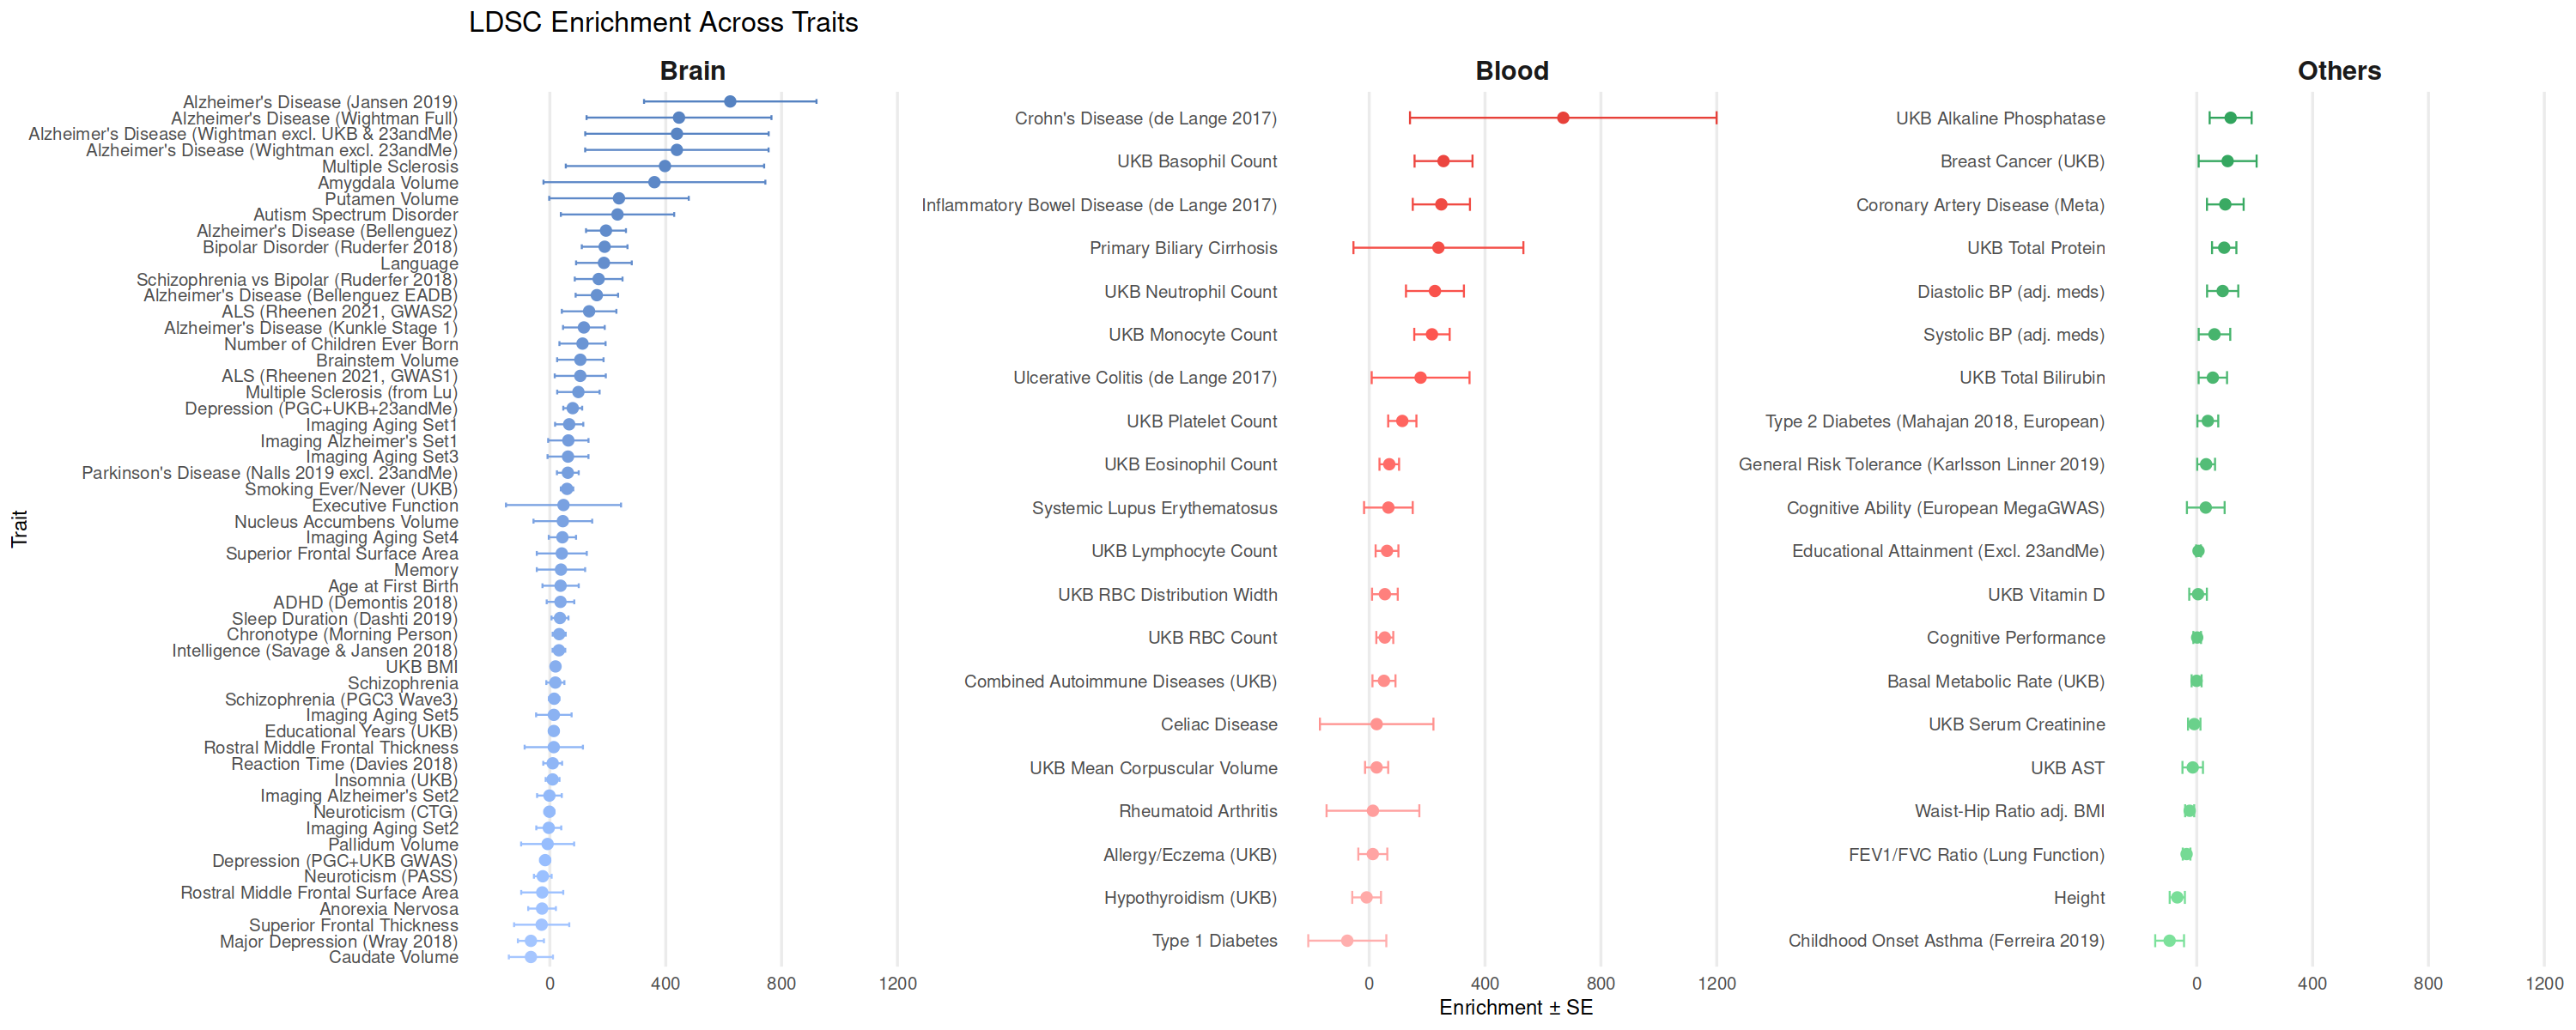

In [29]:
options(repr.plot.width = 25, repr.plot.height = 10)

library(ggplot2)
library(RColorBrewer)

category_colors <- c(
  "Blood" = "#4575B4",     # 
  "Brain" = "#D73027",     # 
  "All" = "#1A9850",    # 
  "Others" = "#984EA3"      # others
)

# Assign colors by category (soft variations within each)
traits_dt <- traits_dt %>%
  group_by(category) %>%
  mutate(
    trait_order = as.integer(factor(trait, levels = unique(trait[order(enrichment)]))),
    n_traits = n(),
    color = lighten(category_colors[category], 
                    amount = scales::rescale(trait_order, to = c(0.6, 0.1)))
  ) %>%
  ungroup()

ggplot(traits_dt, aes(x = reorder(trait, enrichment), y = enrichment, color = trait)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = enrichment - se, ymax = enrichment + se), width = 0.3) +
  coord_flip() +
  facet_wrap(~category, scales = 'free_y') +
  labs(
    title = "LDSC Enrichment Across Traits",
    x = "Trait",
    y = "Enrichment ± SE"
  ) +
  scale_color_manual(values = setNames(traits_dt$color, traits_dt$trait)) +
  theme_minimal(base_size = 16) +
  theme(
    strip.text = element_text(face = "bold", size = 18),
    axis.text.y = element_text(size = 12),
    axis.text.x = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank()
  )